## Boombikes - Linear Regression Assignment

### Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [3]:
# Read the given CSV file, and view some sample records

bike = pd.read_csv('Boombikes.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's inspect the various aspects of our dataframe

In [4]:
#Determining the number of rows and columns
bike.shape

(730, 16)

In [5]:
#summary of numeric columns in the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Datatypes of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Checking missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values in the dataset

### Dropping the Unnecessary Variables

In [8]:
bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [9]:
#Rename the columns for better understanding
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [10]:
#Checking the unique Values
bike.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
bike.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [12]:
#Mapping season variables

# Create season mapping variable
season_name  = {1:'spring',2:'summer',3:'fall',4:'winter'}

# Mapping Season names for the number
bike.season = bike.season.map(season_name).astype("category")

In [13]:
#Mapping Weather variables

# Create weather mapping variable
weather_name = {1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'}

# Mapping Season names for the number
bike.weathersit = bike.weathersit.map(weather_name).astype("category")

In [14]:
#Mapping variables month, weekday

bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Data Visualisation

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

### Identifying Continuous and Categorical Features

In [16]:
bike.dtypes

season        category
Year             int64
month           object
holiday          int64
weekday         object
workingday       int64
weathersit    category
temp           float64
humidity       float64
windspeed      float64
count            int64
dtype: object

In [17]:
# Checking the number of unique values is a column
# If the number of unique values <=40: Categorical column
# If the number of unique values in a columns> 40: Continuous

bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
windspeed     649
count         695
dtype: int64

### Univariate Analysis  - Categorical Variables

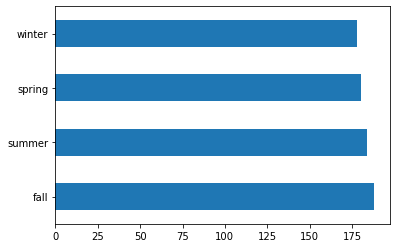

In [18]:
#Season
bike.season.value_counts().plot.barh()
plt.show()

Boom Bike rentals are more during the fall season

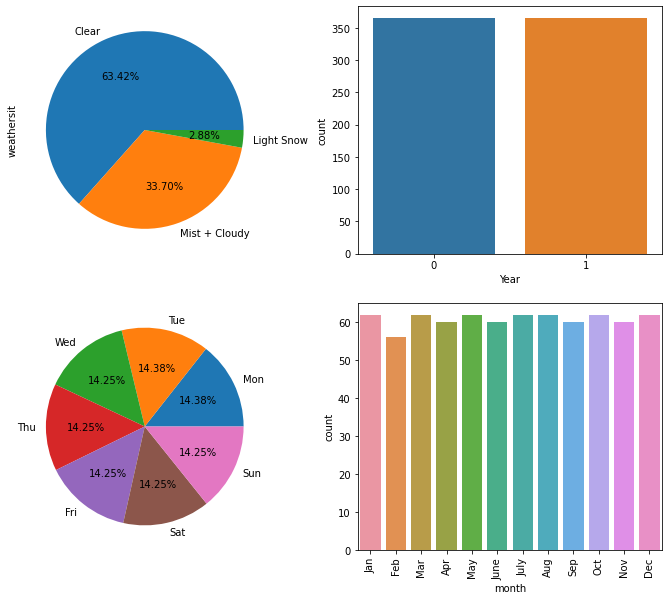

In [19]:
#Weathersit, Year, Weekday, Month

plt.figure(figsize=[12,10])
plt.subplot(221)
bike.weathersit.value_counts().plot.pie(autopct="%1.2f%%")
plt.subplot(222)
sns.countplot(bike.Year)
plt.subplot(223)
plt.pie(bike.weekday.value_counts(),autopct="%1.2f%%",labels=bike.weekday.unique())
plt.xticks(rotation=90)
plt.subplot(224)
sns.countplot(bike.month)
plt.xticks(rotation=90)
plt.show()

1.Boombikes are more active during clear days followed by misty+cloudy days

2.Boombikes are operated through out the year and active on all the days of week

3.They are less active on the February month.

### Univariate Analysis  - Continuous Variables

In [20]:
def dist_plt(col):
    plt.figure(figsize=(5,5), dpi=70)
    sns.distplot(bike[col])
    plt.title("Distribution of"+" "+col)

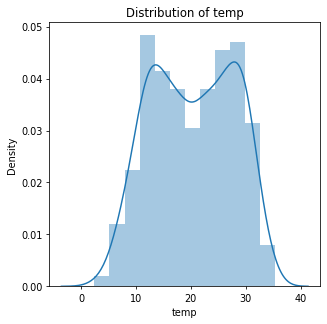

In [21]:
dist_plt("temp")

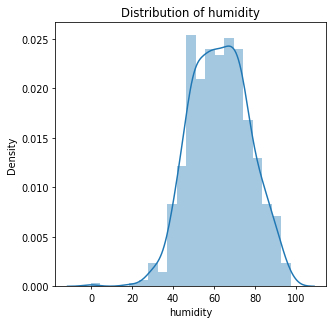

In [22]:
dist_plt("humidity")

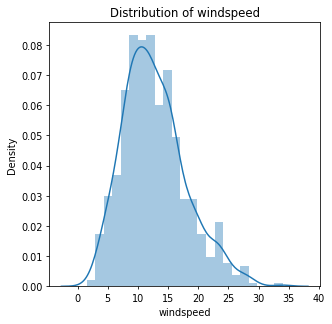

In [23]:
dist_plt("windspeed")

### Bivariate Analysis - Categorical Variables

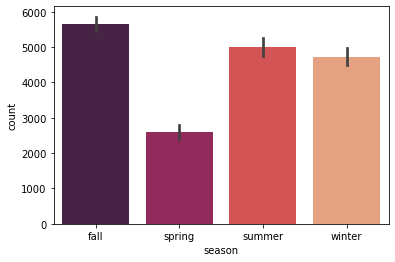

In [24]:
#Season
sns.barplot('season','count',data=bike,palette="rocket")
plt.show()

Bike Rentals are more during the Fall season and then in summer. Least is during the spring

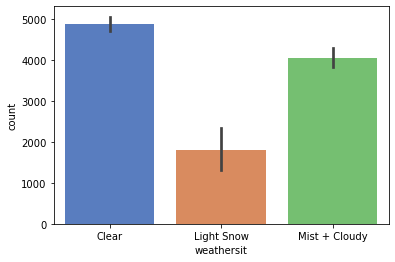

In [25]:
#Weather

sns.barplot('weathersit','count',palette="muted",data=bike)
plt.show()

Bike Rentals are more during the clear weather followed by Mist+Cloudy


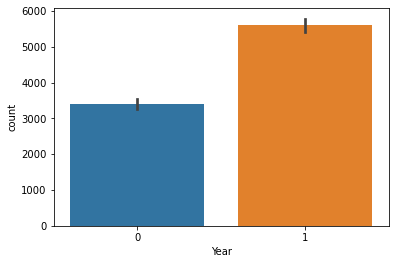

In [26]:
#Year
# 0 - 2018 , 1 -2019

sns.barplot('Year','count',data=bike)
plt.show()

Bike rentals are more in the year 2019 compared to 2018

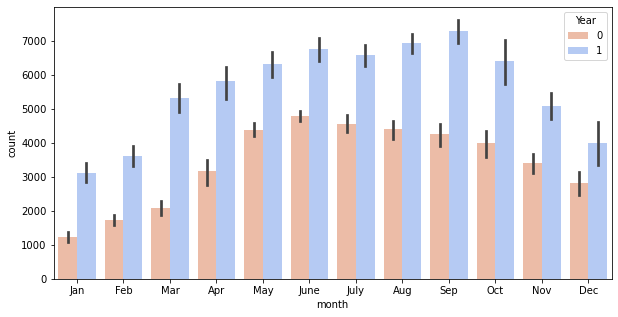

In [27]:
#month
# 0 - 2018 , 1 -2019

plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='Year',data=bike,palette='coolwarm_r')
plt.show()

Bike Rentals are more in the year 2019 compared to 2018. 

In 2019, Bike Rentals was high during September and low during January

In 2018, Bike Rentals was high during June and low during Jan

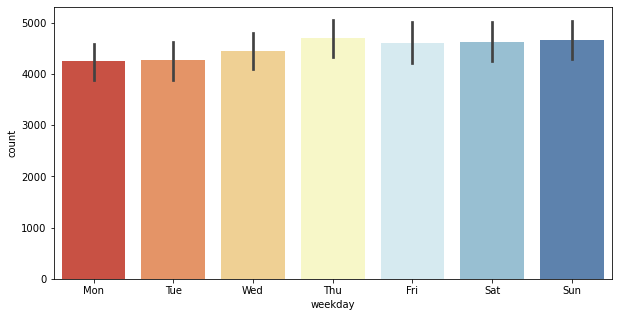

In [28]:
#Weekday

plt.figure(figsize=(10,5))
sns.barplot('weekday','count',data=bike,palette='RdYlBu')
plt.show()

Bike Rentals are evenly distributed through out the week.

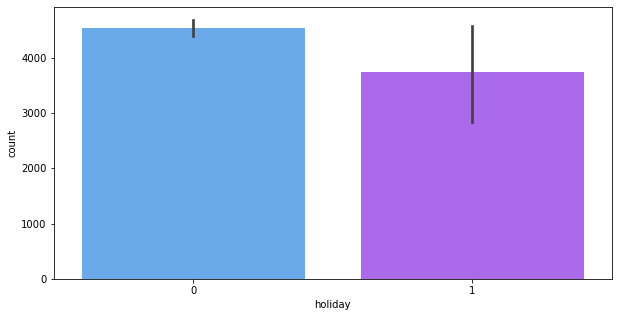

In [29]:
#Holiday

plt.figure(figsize=(10,5))
sns.barplot('holiday','count',data=bike,palette='cool')
plt.show()

Bike Renatals are more during the Working day than in Holiday

### Bivariate Analysis -Continuous Variable

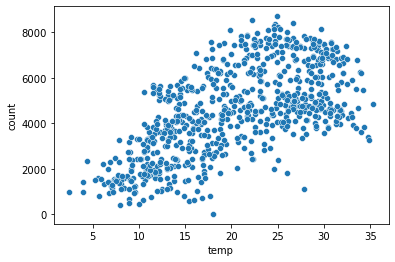

In [30]:
# Temperature
sns.scatterplot(x='temp',y='count' ,data=bike)
plt.show()

Bike Rentals are observed at higher temperatures. When Temperature increases, Bike Rental Increases, Positively Correlated

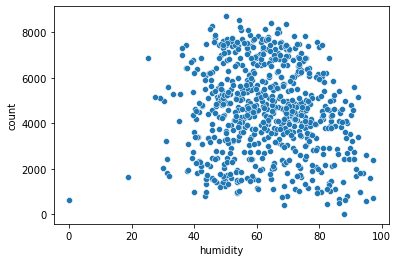

In [31]:
#Humidity
sns.scatterplot(x='humidity', y='count',data=bike)
plt.show()

Bike rental are high during moderate humid condition, At Higher Humidity, Bike rentals are minimal.


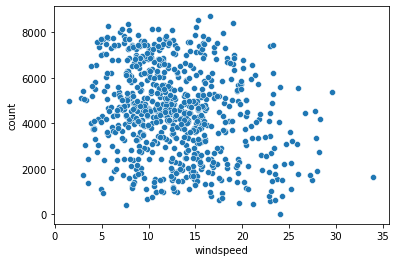

In [32]:
#Windspeed

sns.scatterplot(x='windspeed', y='count',data=bike)
plt.show()

Bike Rentals are more when windspeed is between 5 to 20 and decreases with increase in windspeed

### Multivariate Analysis

Pairplot to understand the numeric variables and to check the correlation to the target variable 'count'.

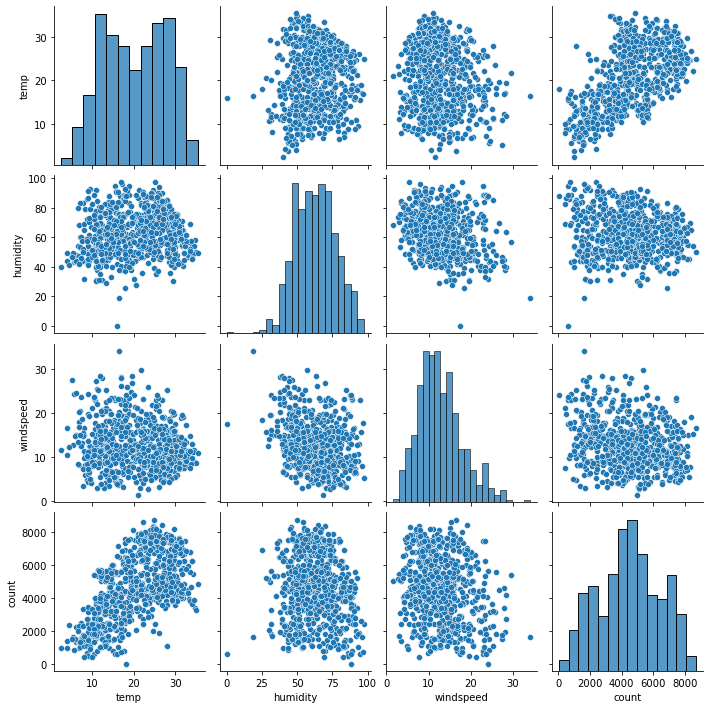

In [33]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=["temp", "humidity",'windspeed','count'])
plt.show()

By analysing all the plots above, 

-  Bike rentals are more correlated to temperature



In [34]:
#summary of numeric column
bike.describe()

,Year,holiday,workingday,temp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [35]:
#Numerical Continuous column:
col = ["temp","humidity","windspeed","count"]

In [36]:
#Funcation for displaying outliers in columns
def find_outliers(list_of_col):
    plt.figure(figsize=[15,8])
    for i in enumerate(list_of_col):
        sns.set_style('whitegrid')
        plt.subplot(round(len(list_of_col)/2),2,i[0]+1)
        sns.boxplot(data=bike, x=i[1])

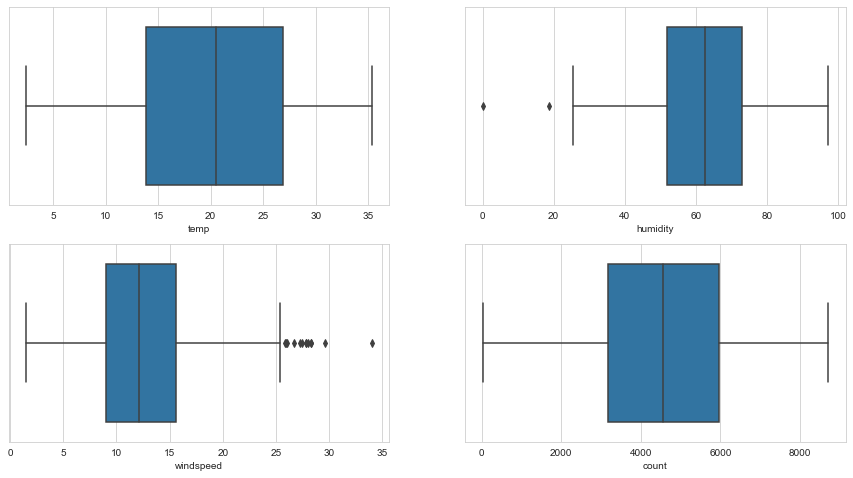

In [37]:
find_outliers(col)

We see that there are outliers in windspeed 

### Correlation of Variables

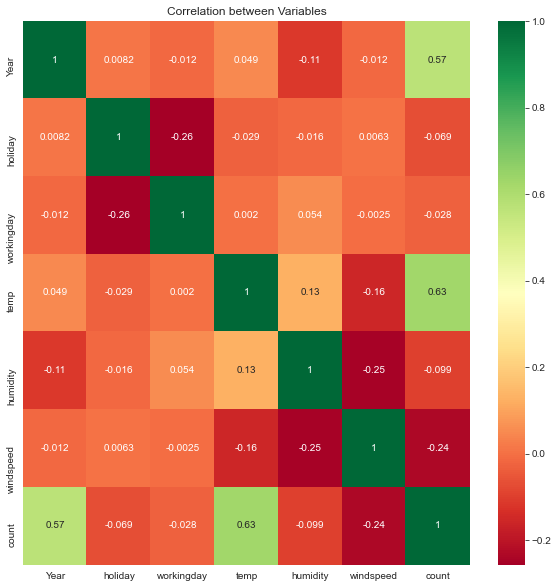

In [38]:
###Heatmap to understand Correlation between Variables
plt.figure(figsize=[10,10])
sns.heatmap(bike.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

We see that year and temperature are positively collerated to count variable. Holiday , workingday , Humidity , Windspeed are negatively corrrelated

### Data Preparation

In [39]:
#Checking datatypes of all the columns
bike.dtypes

season        category
Year             int64
month           object
holiday          int64
weekday         object
workingday       int64
weathersit    category
temp           float64
humidity       float64
windspeed      float64
count            int64
dtype: object

In [40]:
#Get the dummy variables for month, season, weathersit, weekday using 'drop_first = True'pd.get_dummies(bike.season,drop_first=True)
months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [41]:
# Add the dummy variables to the original bike dataframe
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [42]:
# Drop the 'season','month','weekday','weathersit' 
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [43]:
#Number of rows and columns
bike.shape

(730, 29)

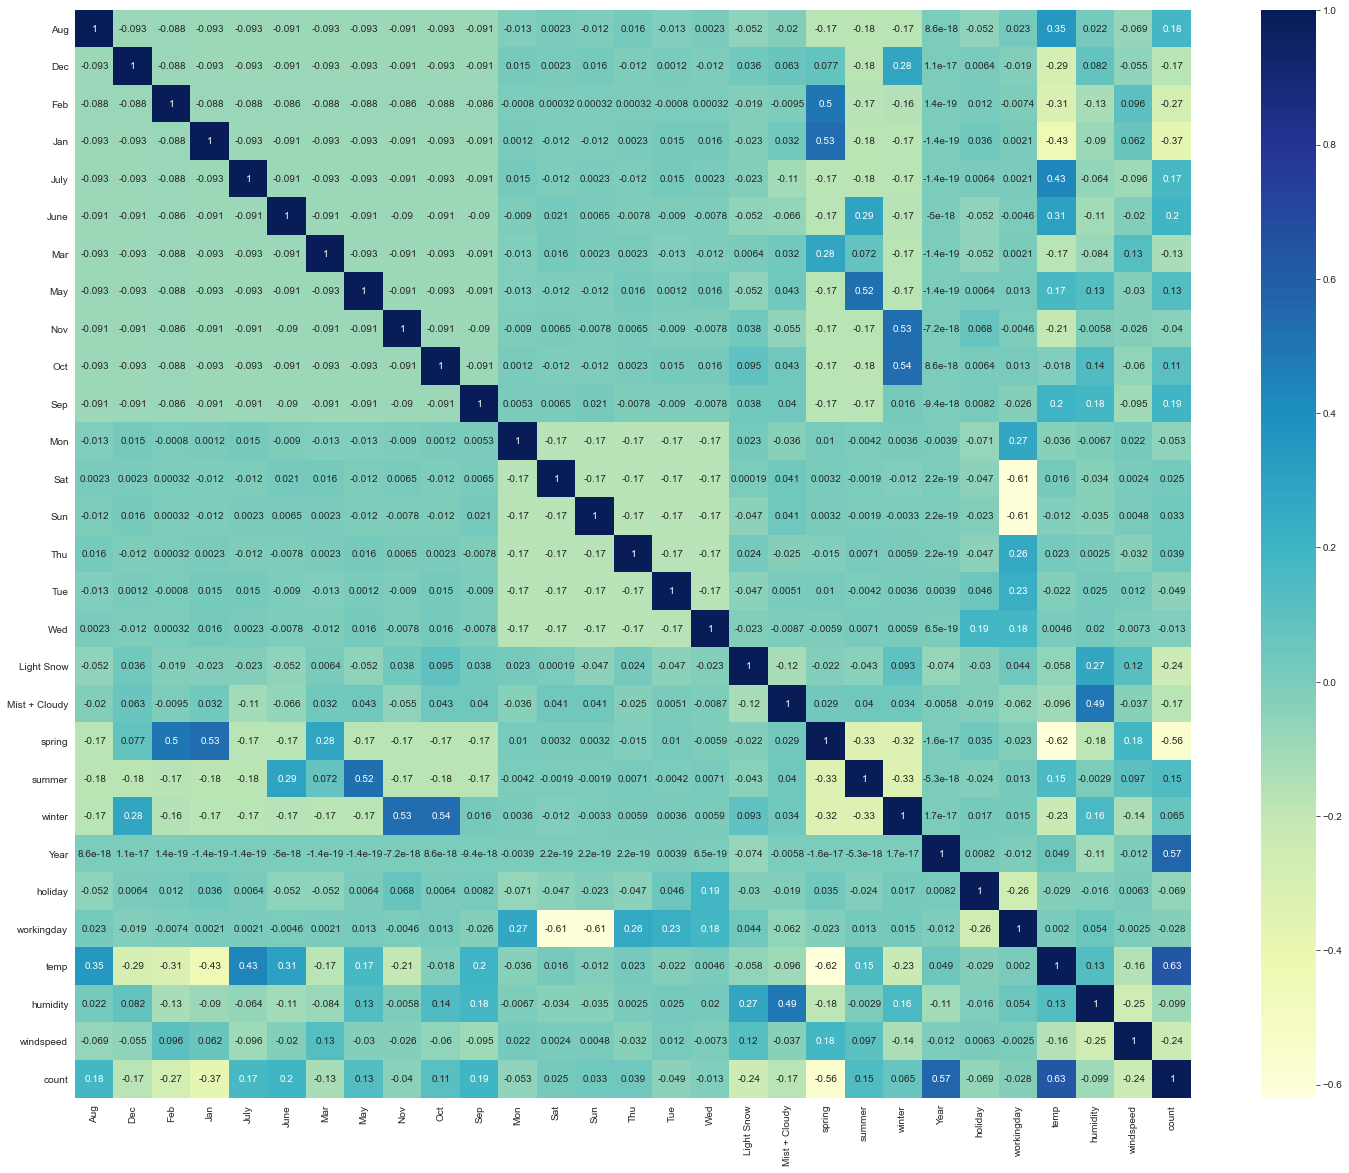

In [44]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.show()

We can observe that temperature,Year,Summer season,June to october months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals.

### Splitting the Data into Training and Testing Sets

Before model building, We need to perform the test-train split and scale the features.

In [45]:
from sklearn.model_selection import train_test_split

# To get train and test data set with same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [46]:
#Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


#### Rescaling the Features

In [47]:
#There are two common ways of rescaling

#Normalisation = (x-xmin)/(x max-x min) : Between 0 and 1
#Standardisation= (x-mu)/ sigma      : mean-0, sigma-1

#we will be using minmax Scaling.

##### Min-Max scaling

In [48]:
#import the library
from sklearn.preprocessing import MinMaxScaler

In [49]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [50]:
#Checking numeric variables(min and max) after scaling
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**All the numeric variables are now mapped between 0 and 1**

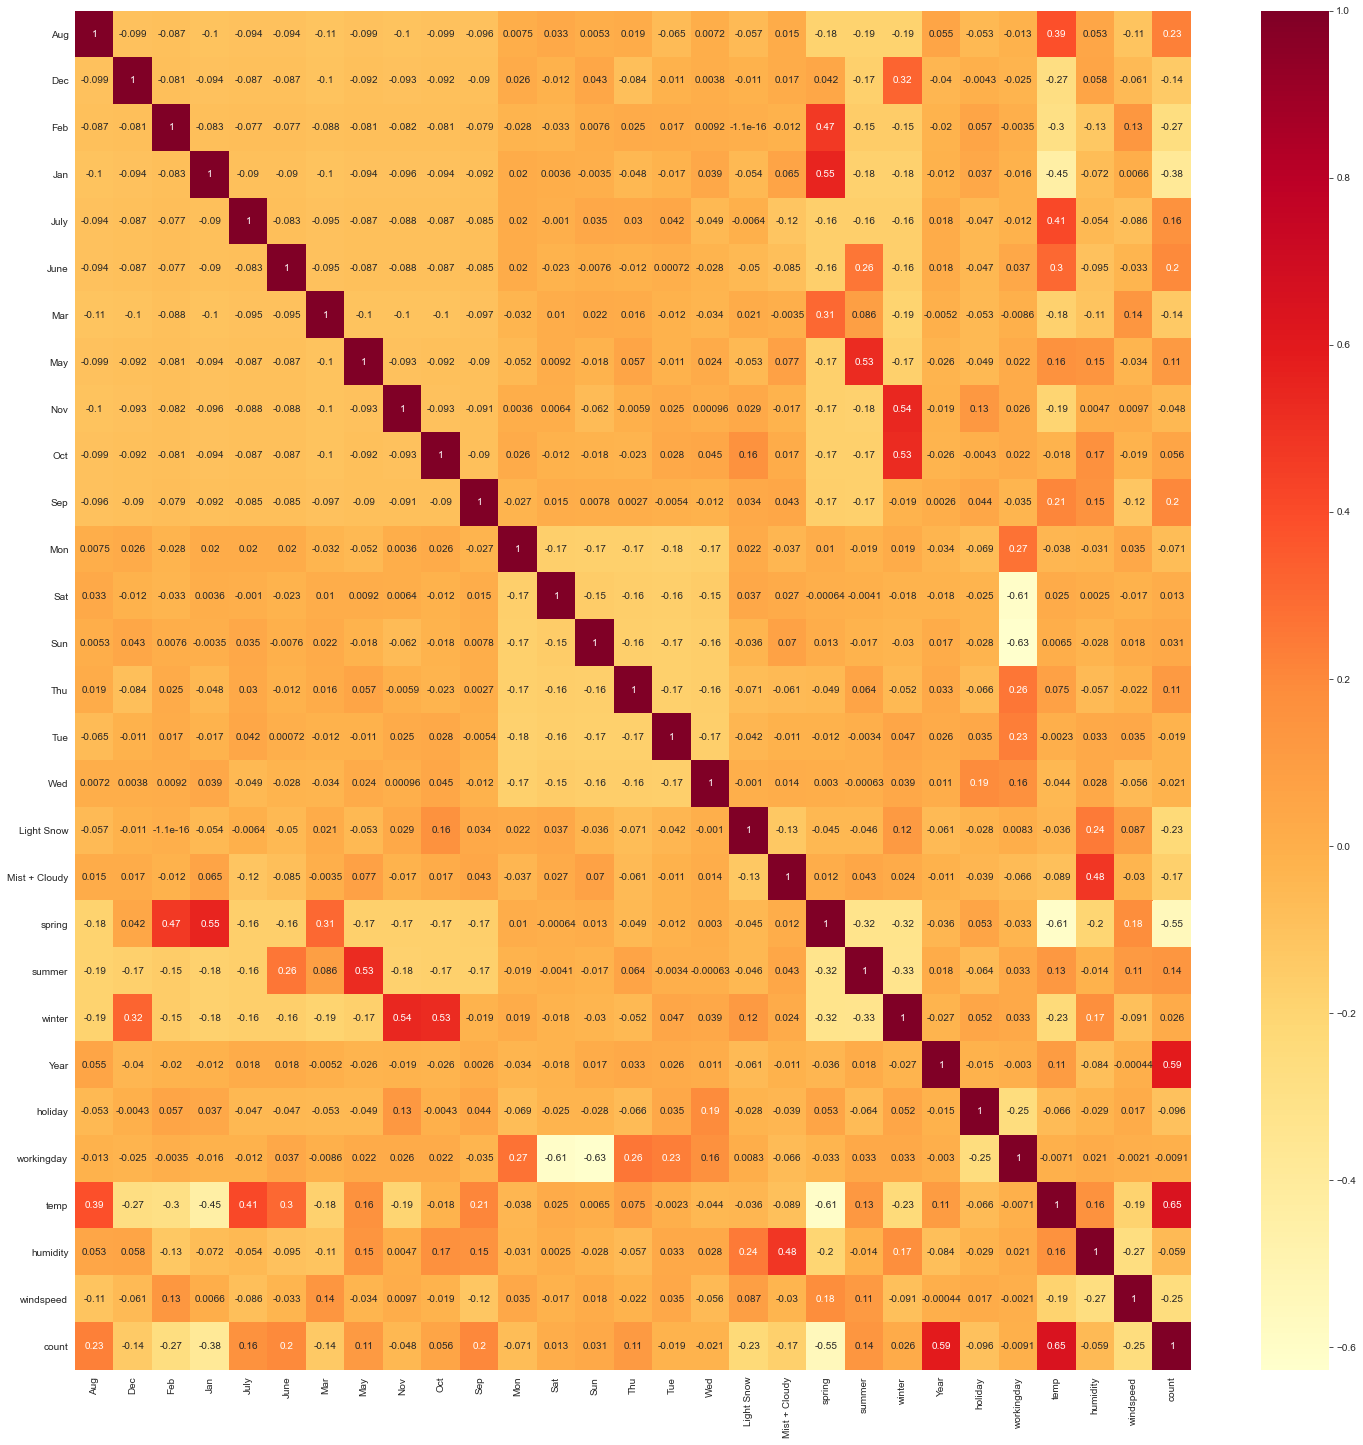

In [51]:
# Checking the correlation coefficients to see which variables are highly correlated after scaling

plt.figure(figsize=(25, 25))
sns.heatmap(bike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

From the heatmap we can see temp, year are correlated to the 'count' variable. June, July, August, September are also highly correlated to count.


#### Dividing into X and Y sets for the model building

In [52]:
#Divide the data into X and y
y_train = bike_train.pop('count')
X_train = bike_train

In [53]:
#Inspecting y_train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

In [54]:
#Inspecting X_train
X_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.345824,0.751824,0.380981


###  Building a linear model

#### RFE **Recursive Feature Elimination**

In [55]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
#Building the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
# Checking RFE with the output variable equal to 15
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [58]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [59]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'Year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [60]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [61]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [62]:
# Importing Stats model and Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [63]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [64]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          8.15e-189
Time:                        21:48:51   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

In [65]:
#Drop the constant variable
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

#### Checking VIF
Variance Inflation Factor or VIF, gives a basic idea about how much the feature variables are correlated with each other. 

##### The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we will built the model. The VIFs and p-values both should be within an acceptable range.

In [66]:
#Importing VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
def VIF(X_train_rfe):
    # create a dummy dataframe
    vif = pd.DataFrame()
    
    # extract the column values to vif features column value
    vif['Features'] = X_train_rfe.columns
    
    # calculate vif for the train data for the added features
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    
    # round the value to 2 decimals
    vif['VIF'] = round(vif['VIF'], 2)
    
    # sort values by hightevif value first
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # retrun vif object
    return vif

In [68]:
VIF(X_train_rfe)

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,Year,2.09
3,Nov,1.85
1,Jan,1.75


**December is insignificant in presence of other variables due to high p-value and low VIF; can be dropped**

In [69]:
#Drop December
X_train_new1 = X_train_rfe.drop(["Dec"], axis = 1)

##### Rebuilding the model without 'Dec'

In [70]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          4.41e-189
Time:                        21:49:11   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3032      0.035      8.598

In [71]:
#Drop the constant term
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [72]:
# Calculate the VIFs for the new model
VIF(X_train_lm1)

,Features,VIF
12,humidity,29.09
11,temp,16.80
13,windspeed,4.72
6,spring,4.37
8,winter,3.78
7,summer,2.80
5,Mist + Cloudy,2.29
9,Year,2.09
0,Jan,1.67
2,Nov,1.60


**'humidity' variable can be dropped as its insignificant by looking at very high  VIF**

##### Rebuilding the model without 'humidity'

In [73]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

In [74]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          5.93e-186
Time:                        21:49:15   Log-Likelihood:                 501.87
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     496   BIC:                            -916.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2208      0.031      7.190

In [75]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [76]:
# Calculate the VIFs for the new model
VIF(X_train_lm2)

,Features,VIF
11,temp,5.15
12,windspeed,4.67
6,spring,2.76
8,winter,2.28
7,summer,2.24
9,Year,2.07
0,Jan,1.61
2,Nov,1.60
1,July,1.59
5,Mist + Cloudy,1.56


**Nov variable seems to be insignificant, by looking at p value and low  VIF. We can drop it**

In [77]:
#Drop the Nov column
X_train_new3=X_train_lm2.drop(['Nov'],axis=1)

In [78]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          8.14e-187
Time:                        21:49:21   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088

In [79]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [80]:
# Calculate the VIFs for the new model
VIF(X_train_lm3)

,Features,VIF
10,temp,5.13
11,windspeed,4.62
5,spring,2.75
6,summer,2.24
8,Year,2.07
7,winter,1.78
0,Jan,1.61
1,July,1.59
4,Mist + Cloudy,1.56
2,Sep,1.34


**Jan variable seems to be insignificant, by looking at p value and low  VIF. We can drop it**

##### Rebuliding the model without Jan

In [81]:
#Drop the Jan column
X_train_new4=X_train_lm3.drop(['Jan'],axis=1)

In [82]:
# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          5.06e-187
Time:                        21:49:44   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

In [83]:
#Drop constant 
X_train_lm4=X_train_lm4.drop(['const'],axis=1)

In [84]:
# Calculate the VIFs for the new model
VIF(X_train_lm4)

,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,summer,2.23
4,spring,2.08
7,Year,2.07
6,winter,1.78
0,July,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow,1.08


**Windspeed seems to be insignificant,by looking at  high VIF and negative correlation with count.  Lets drop it**

##### Rebuilding the model without windspeed

In [85]:
#Drop Windspeed
X_train_new5= X_train_lm4.drop(['windspeed'], axis=1)

In [86]:
#Build a model
X_train_lm5=sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          5.71e-181
Time:                        21:49:47   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1501      0.029      5.124

In [87]:
#Drop constant
X_train_lm5= X_train_lm5.drop(['const'], axis=1)

In [88]:
# Calculate the VIFs for the new model
VIF(X_train_lm5)

,Features,VIF
9,temp,4.22
7,Year,2.06
5,summer,1.94
0,July,1.58
6,winter,1.57
3,Mist + Cloudy,1.55
4,spring,1.40
1,Sep,1.34
2,Light Snow,1.07
8,holiday,1.04


**July seems to be insignificant,by looking at p Value and low VIF.  Lets drop it**

In [89]:
#Drop July
X_train_new6= X_train_lm5.drop(['July'], axis=1)

In [90]:
#Build a model
X_train_lm6=sm.add_constant(X_train_new6)
lm6=sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          1.33e-180
Time:                        21:49:50   Log-Likelihood:                 477.90
No. Observations:                 510   AIC:                            -935.8
Df Residuals:                     500   BIC:                            -893.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1414      0.029      4.826

In [91]:
#Drop constant
X_train_lm6= X_train_lm6.drop(['const'], axis=1)

In [92]:
# Calculate the VIFs for the new model
VIF(X_train_lm6)

,Features,VIF
8,temp,2.89
6,Year,2.06
4,summer,1.63
2,Mist + Cloudy,1.55
5,winter,1.43
3,spring,1.33
0,Sep,1.23
1,Light Snow,1.07
7,holiday,1.04


##### We have the decent model ready.

On Removing the temp Variable R2 and Adjusted R2 are going below 75% . So we can finalise the lm6 model.

**- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.821 or 82.1%**

**- The adjusted R-squared adjusts for the number of features in the model. And we observe it is around 0.818 or 81.8%**

##### Residual Analysis of the train data

We need to check whether error terms are also normally distributed 

In [93]:
X_train_lm6=sm.add_constant(X_train_lm6)
#X_train_lm6.columns
X_train_lm6

,const,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,temp
576,1.0,0,0,0,0,0,0,1,0,0.815169
426,1.0,0,0,1,1,0,0,1,0,0.442393
728,1.0,0,0,0,1,0,0,1,0,0.245101
482,1.0,0,0,1,0,1,0,1,0,0.395666
111,1.0,0,0,1,0,1,0,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,1,0,0.863973
53,1.0,0,0,0,1,0,0,0,0,0.202618
350,1.0,0,0,1,0,0,1,0,0,0.248216
79,1.0,0,0,1,0,1,0,0,0,0.462664


In [94]:
#y train predicted
y_train_pred = lm6.predict(X_train_lm6)

In [95]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

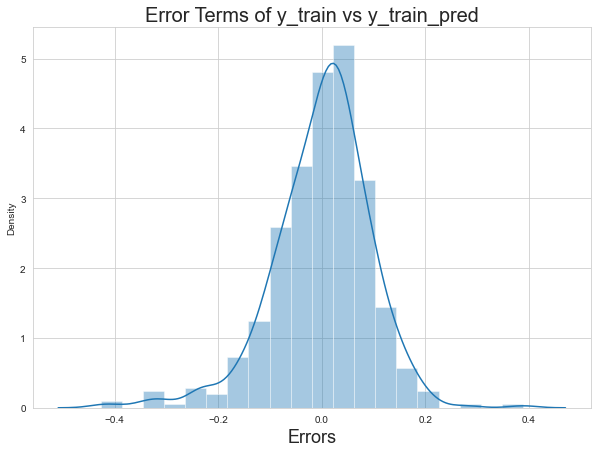

In [96]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(10,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms of y_train vs y_train_pred', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

**We can see Error terms are normally distributed**

####  Making Predictions

In [97]:
# Applying the scaling on the test sets

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


#### Dividing into X_test and y_test


In [98]:
#Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test

In [99]:
#Checking the summary of transformed dataset
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [100]:
#Columns
X_train_new6.columns

Index(['Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer', 'winter',
       'Year', 'holiday', 'temp'],
      dtype='object')

In [101]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new6.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,temp
184,1.0,0,0,1,0,0,0,0,1,0.831783
535,1.0,0,0,0,0,1,0,1,0,0.901354
299,1.0,0,0,1,0,0,1,0,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,1,0,0,0,0.817246


In [102]:
# Making predictions
y_pred = lm6.predict(X_test_new1)

#### Finding R-squared and Adjusted R-Squared for Test set

In [103]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8090304806579877

In [104]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

n=X_test.shape[0]
p=X_test.shape[1]
r2=r2_score(y_test,y_pred)
print(n, p, r2)

220 28 0.8090304806579877


In [105]:
#Finding Adjusted R2
Adj_r2= 1-(1-r2)*(n-1)/(n-p-1)
print(Adj_r2)

0.7810349490266979


#### Model Evaluation

<Figure size 432x288 with 0 Axes>

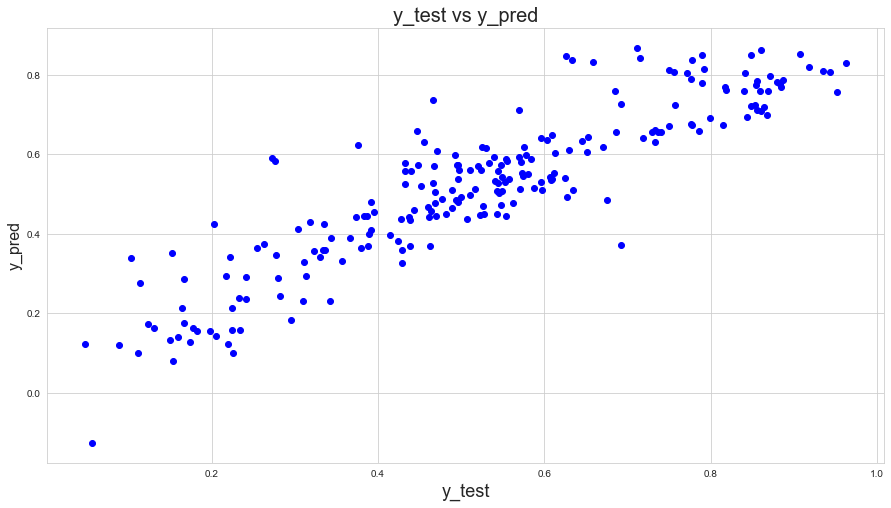

In [106]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)
plt.show()

##### Visualising the fit on the test set

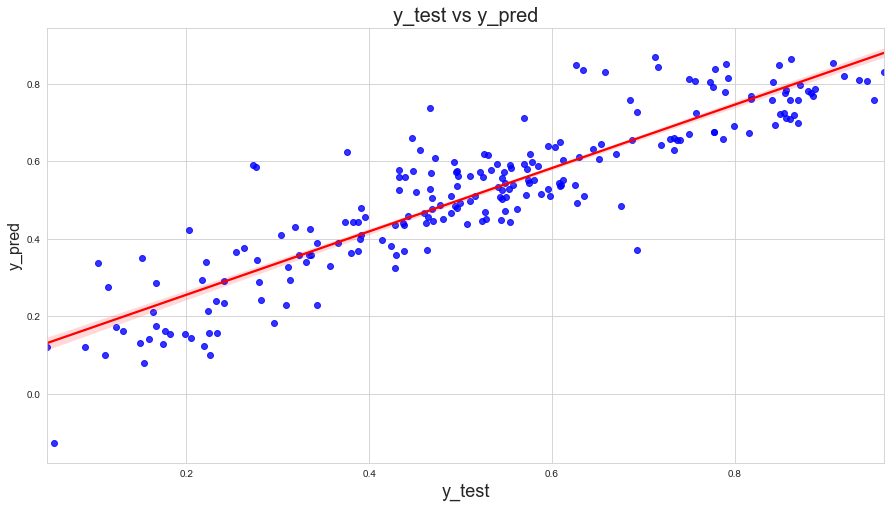

In [107]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  
plt.show()


Best fit line equation:

$ count=      0.1414  + 0.0954 \times Sep +   0.0523   \times Summer + 0.0957 \times winter + 0.2332 \times year + 0.4896 \times temp - 0.2998 \times Light Snow - 0.0770 \times mist+Cloudy   - 0.0638 \times Spring - 0.0991 \times holiday $

### Final Result Comparison between Train model and Test: 

#### - Train R^2 :  0.821

#### - Train Adjusted R^2 : 0.818

#### - Test R^2: 0.8090

#### - Test Adjusted R^2: 0.7810

#### - Difference in R^2 between train and test: 1.2%

#### - Difference in adjusted R^2 between Train and test: 3.7% which is less than 5%

### We can consider this as Decent model

### Interpretation:

#### - We arrived at a very decent model which explains the 82% of the variance in the count variable. 

#### p(F-statistic) is very low explaining the significance of the model.

#### -  We observe that  temperature variable is having the highest coefficient 0.4896, which means if the temperature increases by one unit the number of bike rentals increases by 0.4896 units. BoomBikes shall focus more on Temperature, When Temp Increases, Demand Increases.

#### Boombikes should focus on Summer, Winter seasons to increase the demand and target September Month.

#### Demand for bikes are more in 2019 than 2018

#### A negative coefficient in LightSnow , Mist+Cloudy, Spring , Cloudy suggests that as the independent variable increases, the dependent variable tends to decrease.  Boombikes can provide offers to improve the demand